In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import seaborn as sns

raw_df = pd.read_csv('./data/merged.csv')
print(f"Data rows & cols size: {raw_df.shape}")
raw_df.head()

Data rows & cols size: (188, 15)


,Unnamed: 0,Timestamp,I come to lecture:,I've had prior machine learning / data science experience,Which section are you in?,"About how long, in hours, did you study for exam 1?",What year are you?,Did you do the readings?,How many hours a day on average do you spend on sites with infinite scroll?,How many hours of sleep did you get the night before the exam?,Did you leave the exam early?,What grade do you think you got?,I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes),Total Score,Max Points
0,0,10/19/2025 11:23:58,Always,NaN,NaN,9.0,Junior,Some of them,6.0,7.0,Yes,D,No,42.3,65.0
1,2,10/19/2025 11:24:24,Always,NaN,NaN,6.0,Junior,Some of them,0.0,5.0,No,D,Yes,21.4,65.0
2,3,10/19/2025 11:24:27,Always,NaN,NaN,5.0,Junior,Some of them,2.0,7.0,No,B,No,51.5,65.0
3,4,10/19/2025 11:24:47,Always,NaN,NaN,6.0,Junior,All of them,0.0,8.0,No,B,No,52.4,65.0
4,5,10/19/2025 11:24:50,Always,Quite a bit,NaN,3.0,Junior,Some of them,3.0,3.0,No,C,No,49.5,65.0


In [2]:
# Exploratory Data Analysis
print("Columns:\n", list(raw_df.columns))
print("Datatypes:\n", raw_df.dtypes)
print("Numeric Columns:")
print("----------------")
display(raw_df.describe(include=[np.number]).T)
print("Categorical Columns:")
print("--------------------")
cat_cols = [c for c in raw_df.columns if raw_df[c].dtype == 'object']
for c in cat_cols[:10]:
    print(f"\nValue counts: {c}")
    display(raw_df[c].value_counts(dropna=False).head(10))

Columns:
 ['Unnamed: 0', 'Timestamp', 'I come to lecture:', "I've had prior machine learning / data science experience", 'Which section are you in?', 'About how long, in hours, did you study for exam 1?', 'What year are you?', 'Did you do the readings?', 'How many hours a day on average do you spend on sites with infinite scroll?', 'How many hours of sleep did you get the night before the exam?', 'Did you leave the exam early?', 'What grade do you think you got?', "I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes)", 'Total Score', 'Max Points']
Datatypes:
 Unnamed: 0                                                                                                           int64
Timestamp                                                                                                           object
I come to lecture:                                                                                                  object
I've h

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,188.0,96.478723,56.492246,0.0,47.750,94.50,146.250,193.0
"About how long, in hours, did you study for exam 1?",188.0,9.511702,7.525825,1.0,5.000,8.00,10.000,48.0
How many hours a day on average do you spend on sites with infinite scroll?,188.0,2.562766,1.773580,0.0,1.500,2.00,3.125,11.0
How many hours of sleep did you get the night before the exam?,188.0,6.203723,1.909150,0.0,5.000,7.00,8.000,10.0
Total Score,188.0,42.426064,10.026964,4.7,35.875,42.85,49.925,63.9
Max Points,188.0,65.000000,0.000000,65.0,65.000,65.00,65.000,65.0


Categorical Columns:
--------------------

Value counts: Timestamp


Timestamp
10/19/2025 11:23:58    1
10/19/2025 11:24:24    1
10/19/2025 11:24:27    1
10/19/2025 11:24:47    1
10/19/2025 11:24:50    1
10/19/2025 11:25:28    1
10/19/2025 11:25:37    1
10/19/2025 11:25:52    1
10/19/2025 11:26:19    1
10/19/2025 11:26:39    1
Name: count, dtype: int64


Value counts: I come to lecture:


I come to lecture:
Always                     105
More than half the time     54
Less than half the time     19
Basically never             10
Name: count, dtype: int64


Value counts: I've had prior machine learning / data science experience


I've had prior machine learning / data science experience
Some           90
NaN            75
Quite a bit    23
Name: count, dtype: int64


Value counts: Which section are you in?


Which section are you in?
2:00pm    95
9:30am    56
NaN       37
Name: count, dtype: int64


Value counts: What year are you?


What year are you?
Junior              129
Senior               30
Sophomore            20
It's complicated      9
Name: count, dtype: int64


Value counts: Did you do the readings?


Did you do the readings?
Some of them               95
All of them                78
None of them               12
I don't want to respond     3
Name: count, dtype: int64


Value counts: Did you leave the exam early?


Did you leave the exam early?
No     152
Yes     36
Name: count, dtype: int64


Value counts: What grade do you think you got?


What grade do you think you got?
B                    92
C                    50
D                    16
A                    16
Prefer not to say    11
F                     3
Name: count, dtype: int64


Value counts: I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes)


I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes)
No     177
Yes     11
Name: count, dtype: int64

In [3]:
#Data Cleaning - Dropping irrelevant columns and filling in the NAs (dtypes are already correct) and switching Yes/No categories to 1/0 for some categorical models
df = raw_df.copy()
for col in ['Unnamed: 0', 'Timestamp']:
    if col in df.columns:
        df = df.drop(columns=[col])
df['Did you leave the exam early?'] = df['Did you leave the exam early?'].replace('Yes', 1.0)
df['Did you leave the exam early?'] = df['Did you leave the exam early?'].replace('No', 0.0)
df["I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes)"] = df["I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes)"].replace('Yes', 1.0)
df["I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes)"] = df["I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes)"].replace('No', 0.0)
#Looking at the dataset, the data isn't missing for this column, but instead actually the value "None" that got misinterpreted
df["I've had prior machine learning / data science experience"] = df["I've had prior machine learning / data science experience"].fillna("None")
#Creating new columns
df["is_missing_section"] = df["Which section are you in?"].isna().astype(int)
df.head()

C:\Users\qiang_yhfq0h7\AppData\Local\Temp\ipykernel_18672\2619312157.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Did you leave the exam early?'] = df['Did you leave the exam early?'].replace('No', 0.0)
C:\Users\qiang_yhfq0h7\AppData\Local\Temp\ipykernel_18672\2619312157.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes)"] = df["I wanted the extra credit but just put down random responses (you'll still ge

,I come to lecture:,I've had prior machine learning / data science experience,Which section are you in?,"About how long, in hours, did you study for exam 1?",What year are you?,Did you do the readings?,How many hours a day on average do you spend on sites with infinite scroll?,How many hours of sleep did you get the night before the exam?,Did you leave the exam early?,What grade do you think you got?,I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes),Total Score,Max Points,is_missing_section
0,Always,None,NaN,9.0,Junior,Some of them,6.0,7.0,1.0,D,0.0,42.3,65.0,1
1,Always,None,NaN,6.0,Junior,Some of them,0.0,5.0,0.0,D,1.0,21.4,65.0,1
2,Always,None,NaN,5.0,Junior,Some of them,2.0,7.0,0.0,B,0.0,51.5,65.0,1
3,Always,None,NaN,6.0,Junior,All of them,0.0,8.0,0.0,B,0.0,52.4,65.0,1
4,Always,Quite a bit,NaN,3.0,Junior,Some of them,3.0,3.0,0.0,C,0.0,49.5,65.0,1


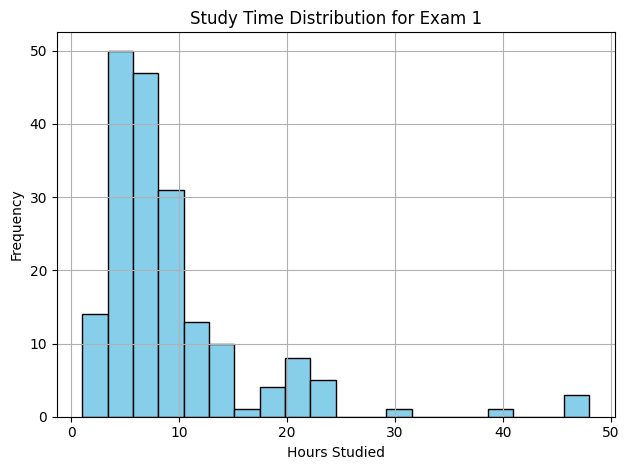

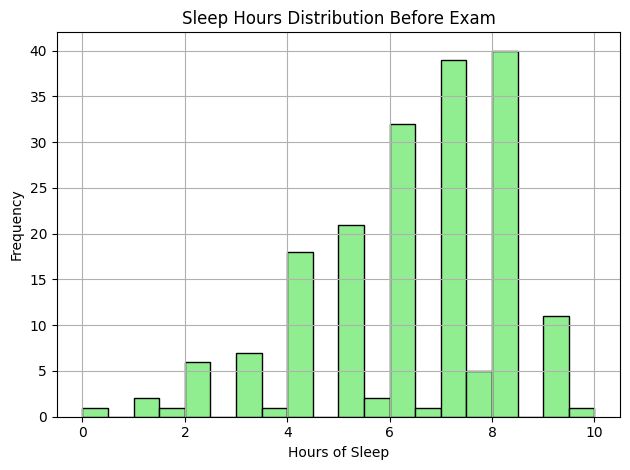

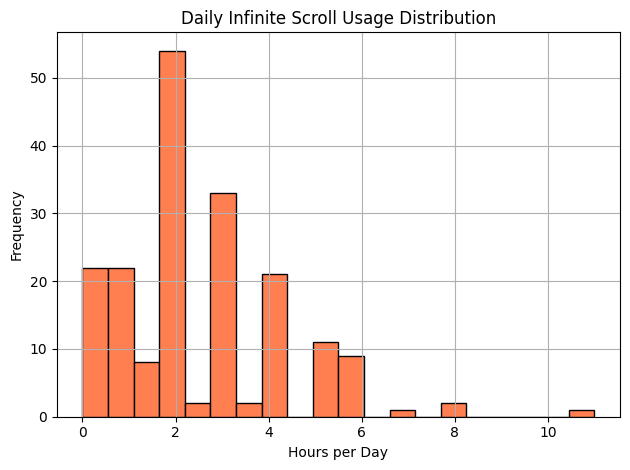

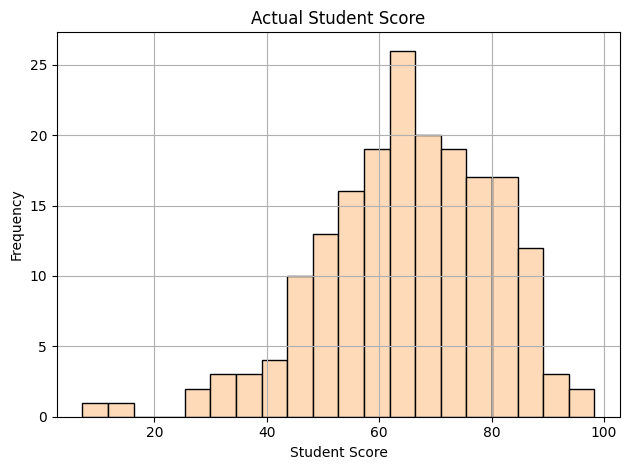

In [4]:
df['About how long, in hours, did you study for exam 1?'].hist(color='skyblue', edgecolor='black', bins=20)
plt.title('Study Time Distribution for Exam 1')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

df['How many hours of sleep did you get the night before the exam?'].hist(color='lightgreen', edgecolor='black', bins=20)
plt.title('Sleep Hours Distribution Before Exam')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

df['How many hours a day on average do you spend on sites with infinite scroll?'].hist(color='coral', edgecolor='black', bins=20)
plt.title('Daily Infinite Scroll Usage Distribution')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

(df['Total Score']/df['Max Points']*100).hist(color='peachpuff', edgecolor='black', bins=20)
plt.title('Actual Student Score')
plt.xlabel('Student Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

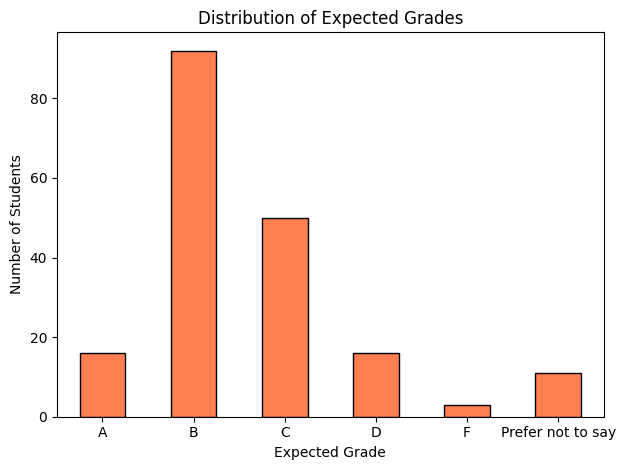

In [5]:
grade_order = ['A', 'B', 'C', 'D', 'F', 'Prefer not to say']

# Get counts in order
grade_counts = df['What grade do you think you got?'].value_counts().reindex(grade_order)

# Plot
grade_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Expected Grades')
plt.xlabel('Expected Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### PART 1

In [6]:
#Training and Testing Splits (and binning each grade by passing/failing)
X = df.drop(['Total Score', 'Max Points'], axis=1)
X = pd.get_dummies(X, columns=["I come to lecture:", "Which section are you in?", "I've had prior machine learning / data science experience", "What year are you?", "Did you do the readings?", "What grade do you think you got?"])
y = ((df['Total Score'] / df['Max Points'] )>= 0.7).astype(int)
print(list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['About how long, in hours, did you study for exam 1?', 'How many hours a day on average do you spend on sites with infinite scroll?', 'How many hours of sleep did you get the night before the exam?', 'Did you leave the exam early?', "I wanted the extra credit but just put down random responses (you'll still get the extra credit if you say yes)", 'is_missing_section', 'I come to lecture:_Always', 'I come to lecture:_Basically never', 'I come to lecture:_Less than half the time', 'I come to lecture:_More than half the time', 'Which section are you in?_2:00pm', 'Which section are you in?_9:30am', "I've had prior machine learning / data science experience_None", "I've had prior machine learning / data science experience_Quite a bit", "I've had prior machine learning / data science experience_Some", "What year are you?_It's complicated", 'What year are you?_Junior', 'What year are you?_Senior', 'What year are you?_Sophomore', 'Did you do the readings?_All of them', "Did you do the readings

In [7]:
#Running KNN, RandomForestClassifier, and Ridge Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier

#KNN
print("KNN:")
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean: {scores.mean():.3f}")
print(f"Std: {scores.std():.3f}")
print("--------------------------")

#RandomForestClassifier
print("Random Forest Classifier:")
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean: {scores.mean():.3f}")
print(f"Std: {scores.std():.3f}")
print("--------------------------")

#RidgeClassifier
print("Ridge Classifier:")
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_ridge)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ridge))
scores = cross_val_score(ridge, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean: {scores.mean():.3f}")
print(f"Std: {scores.std():.3f}")

KNN:
Accuracy: 0.658

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.50      0.62      0.55        13

    accuracy                           0.66        38
   macro avg       0.64      0.65      0.64        38
weighted avg       0.68      0.66      0.66        38

Cross-validation scores: [0.76315789 0.68421053 0.57894737 0.7027027  0.62162162]
Mean: 0.670
Std: 0.064
--------------------------
Random Forest Classifier:
Accuracy: 0.763

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.64      0.69      0.67        13

    accuracy                           0.76        38
   macro avg       0.74      0.75      0.74        38
weighted avg       0.77      0.76      0.77        38

Cross-validation scores: [0.65789474 0.71052632 0.71052632 0.56756757 0.51351351]
Mean: 0.632
Std: 0.07

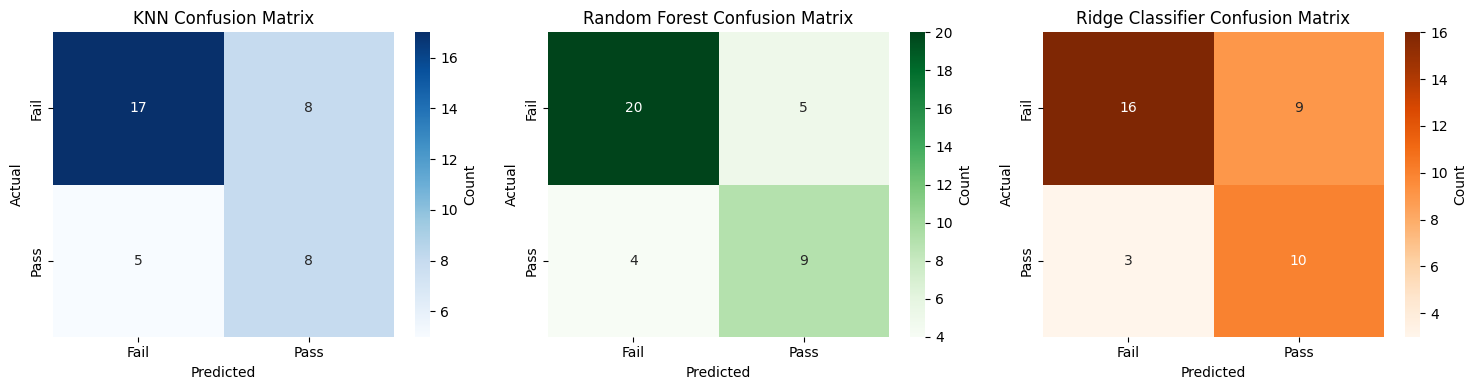

In [8]:
# Confusion Matrices for Classification Algorithms (Part 1)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Fail', 'Pass'])
axes[0].set_yticklabels(['Fail', 'Pass'])

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['Fail', 'Pass'])
axes[1].set_yticklabels(['Fail', 'Pass'])

# Ridge Classifier Confusion Matrix
cm_ridge = confusion_matrix(y_test, y_pred_ridge)
sns.heatmap(cm_ridge, annot=True, fmt='d', cmap='Oranges', ax=axes[2], cbar_kws={'label': 'Count'})
axes[2].set_title('Ridge Classifier Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(['Fail', 'Pass'])
axes[2].set_yticklabels(['Fail', 'Pass'])

plt.tight_layout()
plt.show()


### PART 2

In [9]:
#Training and Testing Splits (and binning each grade by letter grade). X STAYS THE SAME
y = ((df['Total Score'] / df['Max Points'] ).apply(lambda x: "A" if x >= 0.90 else "B" if x >= 0.80 else "C" if x >= 0.70 else "D" if x >= 0.60 else "F"))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Running DecisionTree, SVM, and LogisticRegressionClassifier
#CV with only 3 splits because some target classes don't have enough
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

print("Decision Tree:")
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
scores = cross_val_score(dt, X, y, cv=3, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean: {scores.mean():.3f}")
print(f"Std: {scores.std():.3f}")
print("--------------------------")

print("Support Vector Machine:")
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
scores = cross_val_score(svm, X, y, cv=3, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean: {scores.mean():.3f}")
print(f"Std: {scores.std():.3f}")
print("--------------------------")

print("Logistic Regression:")
lr = LogisticRegression(max_iter=100, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
scores = cross_val_score(lr, X, y, cv=3, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean: {scores.mean():.3f}")
print(f"Std: {scores.std():.3f}")

Decision Tree:
Accuracy: 0.316

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.27      0.50      0.35         6
           C       0.20      0.33      0.25         6
           D       0.38      0.23      0.29        13
           F       0.50      0.33      0.40        12

    accuracy                           0.32        38
   macro avg       0.27      0.28      0.26        38
weighted avg       0.36      0.32      0.32        38

Cross-validation scores: [0.38095238 0.42857143 0.24193548]
Mean: 0.350
Std: 0.079
--------------------------
Support Vector Machine:
Accuracy: 0.342

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.29      0.33      0.31         6
           C       0.33      0.83      0.48         6
           D       0.40      0.15      0.22        13
           

\\wsl.localhost\Ubuntu\home\chris\bufn400\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
\\wsl.localhost\Ubuntu\home\chris\bufn400\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/st

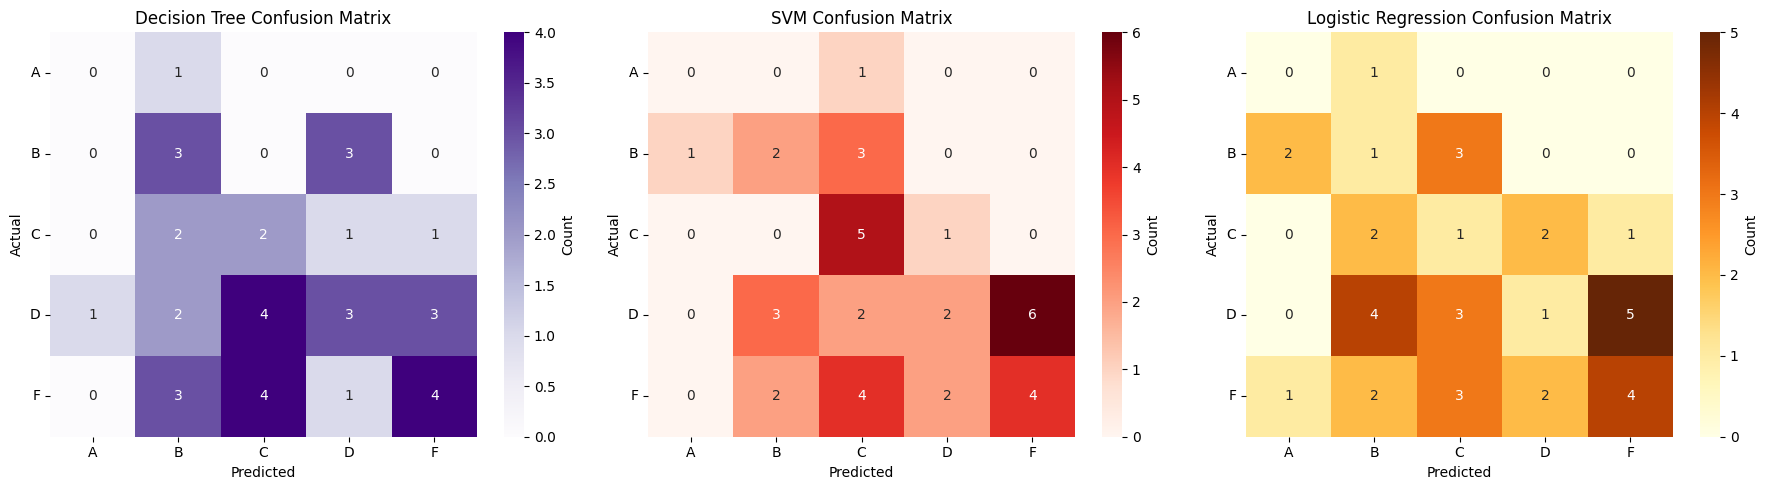

In [12]:
# Confusion Matrices for Classification Algorithms (Part 2)
# Note: Run this cell after running the classification algorithms in the previous cell
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['A', 'B', 'C', 'D', 'F'], rotation=0)
axes[0].set_yticklabels(['A', 'B', 'C', 'D', 'F'], rotation=0)

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['A', 'B', 'C', 'D', 'F'], rotation=0)
axes[1].set_yticklabels(['A', 'B', 'C', 'D', 'F'], rotation=0)

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='YlOrBr', ax=axes[2], cbar_kws={'label': 'Count'})
axes[2].set_title('Logistic Regression Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(['A', 'B', 'C', 'D', 'F'], rotation=0)
axes[2].set_yticklabels(['A', 'B', 'C', 'D', 'F'], rotation=0)

plt.tight_layout()
plt.show()


### PART 3

In [14]:
#Training and Testing Splits for their score percentages through linear regression.
y = ((df['Total Score'] / df['Max Points']) * 100).round(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Running linear regression
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)
y_pred_lr_reg = linearregression.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr_reg)
r2 = r2_score(y_test, y_pred_lr_reg)
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")
scores = cross_val_score(linearregression, X, y, cv=5, scoring='r2')
print(f"CV R² Scores: {scores}")
print(f"Mean CV R²: {scores.mean():.4f}")
print(f"Std CV R²: {scores.std():.4f}")

MSE: 216.2793
R^2: 0.0399
CV R² Scores: [ 0.41673378  0.54911745  0.23109563 -0.36066533 -0.01207709]
Mean CV R²: 0.1648
Std CV R²: 0.3234


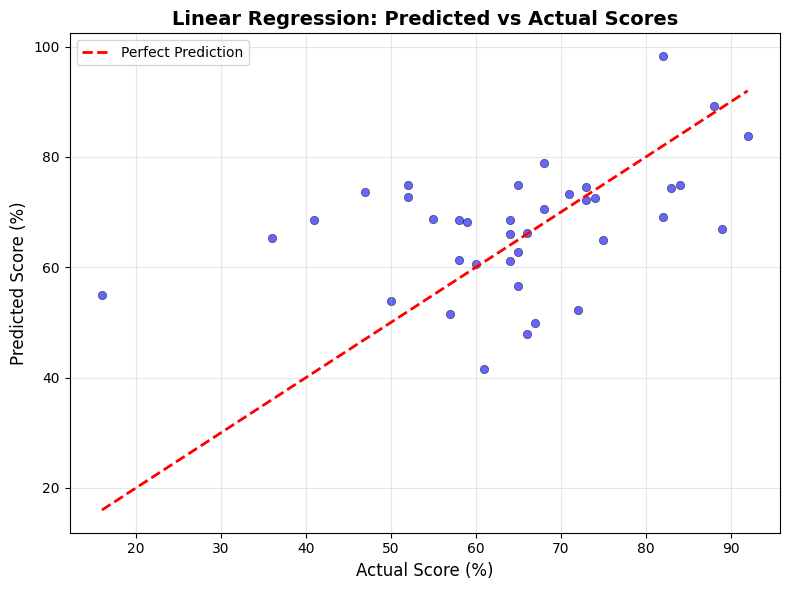

In [16]:
# Scatter Plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr_reg, alpha=0.6, color='blue', edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Score (%)', fontsize=12)
plt.ylabel('Predicted Score (%)', fontsize=12)
plt.title('Linear Regression: Predicted vs Actual Scores', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
#Highkey running RandomForestRegression cuz linear was ahh
from sklearn.ensemble import RandomForestRegressor
rfRegressor = RandomForestRegressor(n_estimators=100)
rfRegressor.fit(X_train, y_train)
y_pred_rf_reg = rfRegressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf_reg)
r2 = r2_score(y_test, y_pred_rf_reg)
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")
scores = cross_val_score(rfRegressor, X, y, cv=5, scoring='r2')
print(f"CV R² Scores: {scores}")
print(f"Mean CV R²: {scores.mean():.4f}")
print(f"Std CV R²: {scores.std():.4f}")

MSE: 242.4971
R^2: -0.0765
CV R² Scores: [ 0.38723977  0.48295707  0.19729941 -0.27362716 -0.02569238]
Mean CV R²: 0.1536
Std CV R²: 0.2756


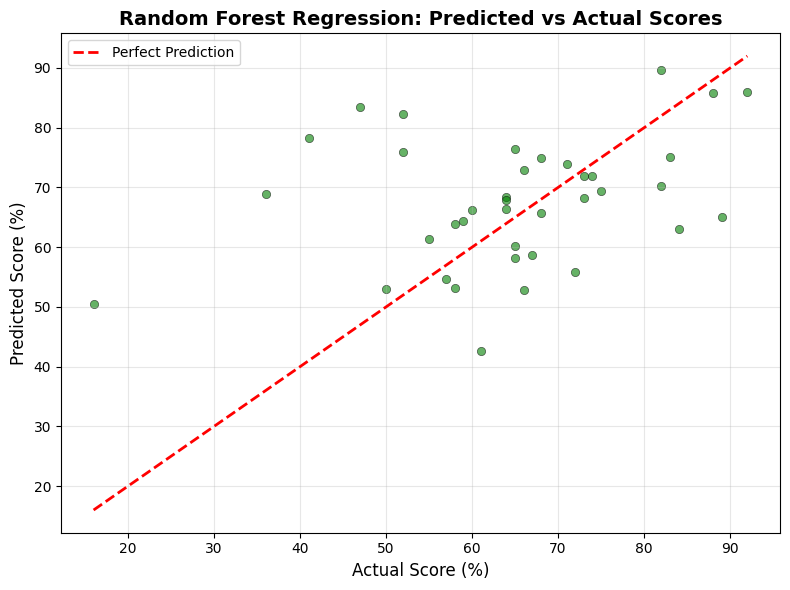

In [18]:
# Scatter Plot for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_reg, alpha=0.6, color='green', edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Score (%)', fontsize=12)
plt.ylabel('Predicted Score (%)', fontsize=12)
plt.title('Random Forest Regression: Predicted vs Actual Scores', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()